# Lab | Customer Analysis Final Round
For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.


# 01 - Problem (case study)
   
    Data Description:
    
        Unnamed: Index
        customer: Customer ID
        state: US State
        customer_lifetime_value: CLV is the client economic value for a company during all their relationship
        response: Response to marketing calls (customer engagement)
        coverage: Customer coverage type
        education: Customer education level
        effective_to_date: Effective to date
        employmentstatus: Customer employment status
        gender: Customer gender
        income: Customer income
        location_code: Customer living zone
        marital_status: Customer marital status
        monthly_premium_auto: Monthly premium
        months_since_last_claim: Last customer claim
        months_since_policy_inception: Policy Inception
        number_of_open_complaints: Open claims
        number_of_policies: Number policies
        policy_type: Policy type
        policy: Policy
        renew_offer_type: Renew
        sales_channel: Sales channel (customer-company first contact)
        total_claim_amount: Claims amount
        vehicle_class: Vehicle class
        vehicle_size: Vehicle size
        vehicle_type: Vehicle type
   
    Goal:

        The objective of this data is to understand customer demographics and buying behavior. Later during the week, we will use predictive analytics to analyze the most profitable customers and how they interact. After that, we will take targeted actions to increase profitable customer response, retention, and growth. For this lab, we will gather the data from 3 csv files that are provided in the files_for_lab folder.

# 02 - Getting Data

In [1]:
# Importing the Libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from numpy import asarray
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
# Read the .csv file. We are using the marketing_customer_analysis.csv file.
file1 = pd.read_csv('marketing_customer_analysis.csv')

# 03 - Cleaning/Wrangling/EDA   

In [3]:
# Change headers names.
file1.columns = file1.columns.str.lower()
file1.columns = file1.columns.str.replace(' ','_')

In [4]:
# Checking the results
display(file1)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [5]:
# Deal with NaN values.
file1.isnull().values.any()

False

In [6]:
# Replacing Nan values:
file1.fillna(0)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [7]:
# Dataframe Breakdown
file1.isnull()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9130,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9131,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9132,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# Categorical Features.
file1.select_dtypes(include=object or str)

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [9]:
# Numerical Features.
file1.select_dtypes(include=[np.int64, np.float64])

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [10]:
# Setting columns to numeric
file1[['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']] = file1[['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']].apply(pd.to_numeric, errors='coerce')

In [11]:
# Removing useless data
file1.drop(columns=['customer', 'effective_to_date'], inplace=True)
display(file1)

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [12]:
# Check for duplicate rows in the data and remove if any.
file1.drop_duplicates()

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9128,California,4100.398533,No,Premium,College,Employed,F,47761,Suburban,Single,...,58,0,1,Personal Auto,Personal L2,Offer1,Branch,541.282007,Four-Door Car,Large
9129,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


Data Exploration

In [13]:
# Show DataFrame info.
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          9134 non-null   object 
 1   customer_lifetime_value        9134 non-null   float64
 2   response                       9134 non-null   object 
 3   coverage                       9134 non-null   object 
 4   education                      9134 non-null   object 
 5   employmentstatus               9134 non-null   object 
 6   gender                         9134 non-null   object 
 7   income                         9134 non-null   int64  
 8   location_code                  9134 non-null   object 
 9   marital_status                 9134 non-null   object 
 10  monthly_premium_auto           9134 non-null   int64  
 11  months_since_last_claim        9134 non-null   int64  
 12  months_since_policy_inception  9134 non-null   i

In [14]:
file2 = file1[['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']]
display(file2)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [15]:
# Describe DataFrame.
file2.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


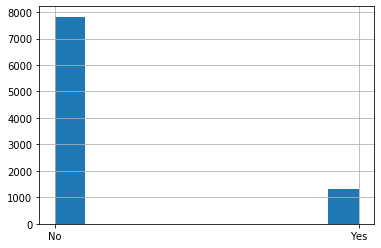

In [16]:
# Show a plot of the total number of responses.
#  Show a plot of the total number of response
file1['response'].hist()
plt.show()

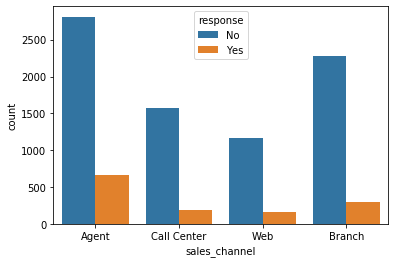

In [17]:
# Show a plot of the response rate by the sales channel
sns.countplot(x="sales_channel", hue="response", data=file1)
plt.show()

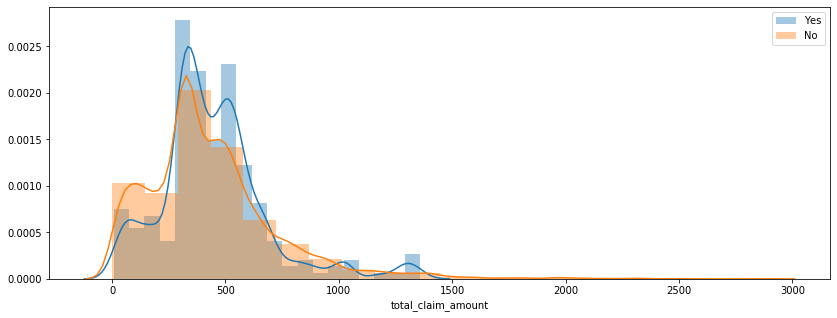

In [18]:
# Show a plot of the response rate by the total claim amount
fig, ax = plt.subplots(figsize=(14,5))
plot_1 = file1[file1["response"]=='Yes']
plot_2 = file1[file1["response"]=='No']

ax = sns.distplot(plot_1["total_claim_amount"],bins=20,label="Yes")
ax = sns.distplot(plot_2["total_claim_amount"],bins=20,label="No")
plt.legend()

plt.show()

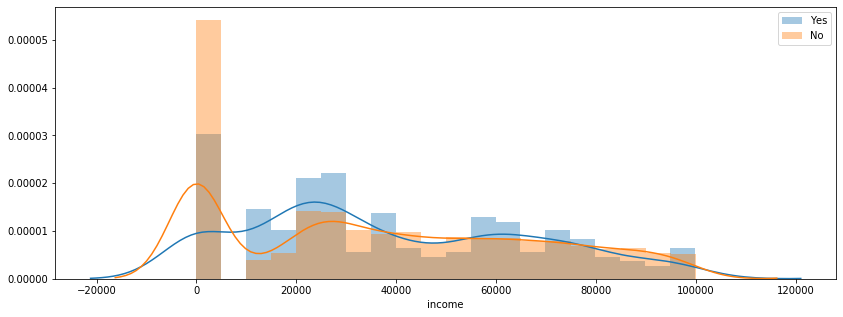

In [19]:
# Show a plot of the response rate by income
fig, ax = plt.subplots(figsize=(14,5))
plot_1 = file1[file1["response"]=='Yes']
plot_2 = file1[file1["response"]=='No']

ax = sns.distplot(plot_1["income"],bins=20,label="Yes")
ax = sns.distplot(plot_2["income"],bins=20,label="No")
plt.legend()

plt.show()

# 04 - Processing Data

In [20]:
# Dealing with outliers.

In [21]:
# Computing IQRs
Q1_all = file2[['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']].quantile(0.25)
Q3_all = file2[['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']].quantile(0.75)
IQR_all = Q3_all - Q1_all

print(IQR_all)

customer_lifetime_value           4967.915247
income                           62320.000000
monthly_premium_auto                41.000000
months_since_last_claim             17.000000
months_since_policy_inception       47.000000
number_of_open_complaints            0.000000
number_of_policies                   3.000000
total_claim_amount                 275.256594
dtype: float64


In [22]:
# Checking IQR ('customer_lifetime_value'):
Q1 = file2[['customer_lifetime_value']].quantile(0.25)
Q3 = file2[['customer_lifetime_value']].quantile(0.75)
IQR = Q3 - Q1

print(IQR)
print(Q1)
print(Q3)

customer_lifetime_value    4967.915247
dtype: float64
customer_lifetime_value    3994.251794
Name: 0.25, dtype: float64
customer_lifetime_value    8962.167041
Name: 0.75, dtype: float64


In [23]:
# Defining the lower and upper whiskers ('customer_lifetime_value'):
lower_whisker = (Q1[0] - 1.5*(IQR[0]))
upper_whisker = (Q3[0] + 1.5*(IQR[0]))

print(lower_whisker)
print(upper_whisker)

-3457.6210762500014
16414.039911750002


In [24]:
# Removing the outliers from the column:
# Creating a list with all outliers ('customer_lifetime_value'):

out_list = list(file2[(file2['customer_lifetime_value']  < lower_whisker) | (file2['customer_lifetime_value'] >  upper_whisker)].index)
print(out_list)

[8, 22, 31, 50, 51, 63, 70, 79, 95, 114, 125, 168, 169, 181, 198, 232, 247, 251, 260, 262, 266, 270, 278, 292, 303, 306, 315, 325, 341, 351, 373, 375, 385, 389, 402, 404, 405, 407, 408, 409, 425, 437, 465, 480, 507, 512, 522, 538, 541, 603, 626, 636, 647, 681, 698, 711, 715, 723, 740, 751, 752, 759, 766, 786, 793, 810, 820, 832, 834, 836, 839, 856, 868, 882, 893, 907, 914, 921, 936, 940, 991, 993, 994, 1002, 1008, 1014, 1016, 1037, 1040, 1041, 1047, 1067, 1071, 1078, 1084, 1099, 1115, 1120, 1127, 1133, 1149, 1154, 1162, 1174, 1183, 1184, 1198, 1200, 1222, 1225, 1227, 1233, 1240, 1261, 1278, 1300, 1301, 1306, 1312, 1316, 1326, 1328, 1330, 1364, 1382, 1383, 1392, 1394, 1396, 1407, 1408, 1419, 1450, 1462, 1466, 1467, 1499, 1506, 1516, 1521, 1526, 1532, 1547, 1555, 1558, 1575, 1592, 1607, 1630, 1639, 1640, 1641, 1650, 1657, 1659, 1720, 1730, 1769, 1796, 1812, 1820, 1824, 1847, 1858, 1861, 1863, 1873, 1891, 1930, 1939, 1945, 1952, 1974, 1983, 1985, 1987, 2002, 2034, 2038, 2039, 2053, 2092, 

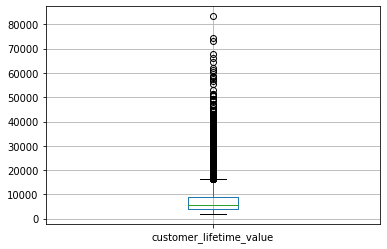

In [25]:
# Checking the outliers before drop ('customer_lifetime_value'):
file2[['customer_lifetime_value']].boxplot()

In [26]:
# Droping the outliers from column
file2 = file2.drop(list(out_list), inplace=False)

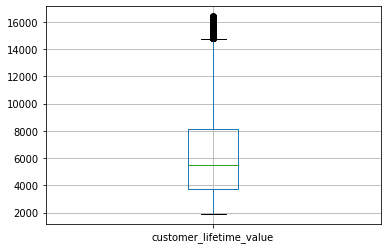

In [27]:
# Checking the outliers after drop ('customer_lifetime_value'):
file2[['customer_lifetime_value']].boxplot()

In [28]:
# Checking IQR ('income'):
Q1 = file2[['income']].quantile(0.25)
Q3 = file2[['income']].quantile(0.75)
IQR = Q3 - Q1

print(IQR)
print(Q1)
print(Q3)

income    62229.0
dtype: float64
income    0.0
Name: 0.25, dtype: float64
income    62229.0
Name: 0.75, dtype: float64


In [29]:
# Defining the lower and upper whiskers ('income'):
lower_whisker = (Q1[0] - 1.5*(IQR[0]))
upper_whisker = (Q3[0] + 1.5*(IQR[0]))

print(lower_whisker)
print(upper_whisker)

-93343.5
155572.5


In [30]:
# Removing the outliers from the column:
# Creating a list with all outliers ('income'):

out_list = list(file2[(file2['income']  < lower_whisker) | (file2['income'] >  upper_whisker)].index)
print(out_list)

[]


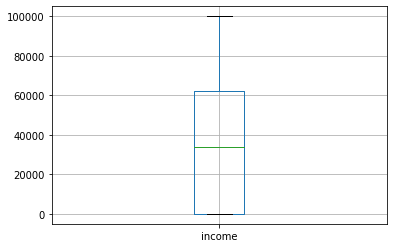

In [31]:
# Checking the outliers before drop ('income'):
file2[['income']].boxplot()

In [32]:
# Droping the outliers from column
file2 = file2.drop(list(out_list), inplace=False)

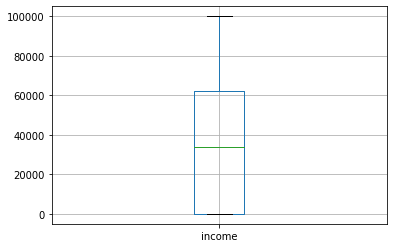

In [33]:
# Checking the outliers after drop ('income'):
file2[['income']].boxplot()

In [34]:
# Checking IQR ('monthly_premium_auto'):
Q1 = file2[['monthly_premium_auto']].quantile(0.25)
Q3 = file2[['monthly_premium_auto']].quantile(0.75)
IQR = Q3 - Q1

print(IQR)
print(Q1)
print(Q3)

monthly_premium_auto    39.0
dtype: float64
monthly_premium_auto    68.0
Name: 0.25, dtype: float64
monthly_premium_auto    107.0
Name: 0.75, dtype: float64


In [35]:
# Defining the lower and upper whiskers ('monthly_premium_auto'):
lower_whisker = (Q1[0] - 1.5*(IQR[0]))
upper_whisker = (Q3[0] + 1.5*(IQR[0]))

print(lower_whisker)
print(upper_whisker)

9.5
165.5


In [36]:
# Removing the outliers from the column:
# Creating a list with all outliers ('monthly_premium_auto'):

out_list = list(file2[(file2['monthly_premium_auto']  < lower_whisker) | (file2['monthly_premium_auto'] >  upper_whisker)].index)
print(out_list)

[45, 123, 143, 196, 207, 248, 377, 410, 418, 429, 435, 496, 510, 519, 581, 609, 633, 755, 757, 760, 775, 817, 840, 871, 888, 901, 926, 944, 970, 978, 1011, 1046, 1058, 1074, 1109, 1157, 1158, 1160, 1161, 1193, 1283, 1292, 1294, 1458, 1504, 1534, 1540, 1541, 1552, 1600, 1626, 1649, 1687, 1714, 1798, 1807, 1819, 1821, 1823, 1881, 1885, 1896, 1918, 2003, 2017, 2024, 2027, 2037, 2076, 2121, 2150, 2180, 2208, 2225, 2229, 2230, 2237, 2261, 2266, 2292, 2310, 2338, 2350, 2373, 2424, 2452, 2453, 2496, 2525, 2533, 2546, 2547, 2623, 2686, 2694, 2695, 2718, 2732, 2760, 2876, 2915, 2935, 2943, 2954, 2989, 3051, 3071, 3085, 3114, 3189, 3195, 3305, 3316, 3424, 3435, 3461, 3462, 3469, 3475, 3478, 3557, 3613, 3690, 3725, 3741, 3806, 3818, 3833, 3848, 3854, 3881, 3923, 3985, 4010, 4026, 4027, 4037, 4070, 4079, 4086, 4102, 4109, 4165, 4220, 4313, 4341, 4342, 4442, 4444, 4498, 4567, 4574, 4682, 4711, 4748, 4768, 4781, 4809, 4837, 4856, 4863, 4888, 4964, 4984, 5018, 5028, 5043, 5062, 5074, 5092, 5133, 5172

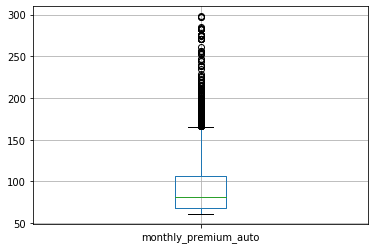

In [37]:
# Checking the outliers before drop ('monthly_premium_auto'):
file2[['monthly_premium_auto']].boxplot()

In [38]:
# Droping the outliers from column
file2 = file2.drop(list(out_list), inplace=False)

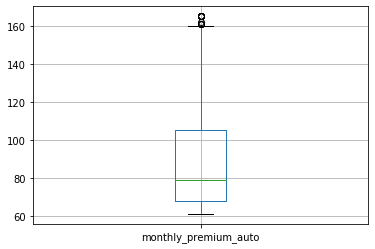

In [39]:
# Checking the outliers after drop ('monthly_premium_auto'):
file2[['monthly_premium_auto']].boxplot()

In [40]:
# Checking IQR ('months_since_last_claim'):
Q1 = file2[['months_since_last_claim']].quantile(0.25)
Q3 = file2[['months_since_last_claim']].quantile(0.75)
IQR = Q3 - Q1

print(IQR)
print(Q1)
print(Q3)

months_since_last_claim    17.0
dtype: float64
months_since_last_claim    6.0
Name: 0.25, dtype: float64
months_since_last_claim    23.0
Name: 0.75, dtype: float64


In [41]:
# Defining the lower and upper whiskers ('months_since_last_claim'):
lower_whisker = (Q1[0] - 1.5*(IQR[0]))
upper_whisker = (Q3[0] + 1.5*(IQR[0]))

print(lower_whisker)
print(upper_whisker)

-19.5
48.5


In [42]:
# Removing the outliers from the column:
# Creating a list with all outliers ('months_since_last_claim'):

out_list = list(file2[(file2['months_since_last_claim']  < lower_whisker) | (file2['months_since_last_claim'] >  upper_whisker)].index)
print(out_list)

[]


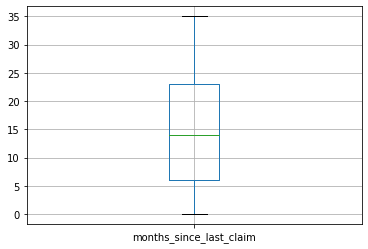

In [43]:
# Checking the outliers before drop ('months_since_last_claim'):
file2[['months_since_last_claim']].boxplot()

In [44]:
# Droping the outliers from column
file2 = file2.drop(list(out_list), inplace=False)

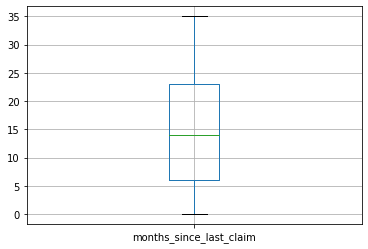

In [45]:
# Checking the outliers after drop ('months_since_last_claim'):
file2[['months_since_last_claim']].boxplot()

In [46]:
# Checking IQR ('months_since_policy_inception'):
Q1 = file2[['months_since_policy_inception']].quantile(0.25)
Q3 = file2[['months_since_policy_inception']].quantile(0.75)
IQR = Q3 - Q1

print(IQR)
print(Q1)
print(Q3)

months_since_policy_inception    47.0
dtype: float64
months_since_policy_inception    24.0
Name: 0.25, dtype: float64
months_since_policy_inception    71.0
Name: 0.75, dtype: float64


In [47]:
# Defining the lower and upper whiskers ('months_since_policy_inception'):
lower_whisker = (Q1[0] - 1.5*(IQR[0]))
upper_whisker = (Q3[0] + 1.5*(IQR[0]))

print(lower_whisker)
print(upper_whisker)

-46.5
141.5


In [48]:
# Removing the outliers from the column:
# Creating a list with all outliers ('months_since_policy_inception'):

out_list = list(file2[(file2['months_since_policy_inception']  < lower_whisker) | (file2['months_since_policy_inception'] >  upper_whisker)].index)
print(out_list)

[]


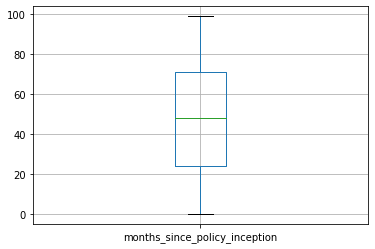

In [49]:
# Checking the outliers before drop ('months_since_policy_inception'):
file2[['months_since_policy_inception']].boxplot()

In [50]:
# Droping the outliers from column
file2 = file2.drop(list(out_list), inplace=False)

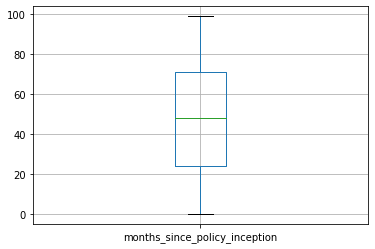

In [51]:
# Checking the outliers after drop ('months_since_policy_inception'):
file2[['months_since_policy_inception']].boxplot()

In [52]:
# Checking IQR ('number_of_open_complaints'):
Q1 = file2[['number_of_open_complaints']].quantile(0.25)
Q3 = file2[['number_of_open_complaints']].quantile(0.75)
IQR = Q3 - Q1

print(IQR)
print(Q1)
print(Q3)

number_of_open_complaints    0.0
dtype: float64
number_of_open_complaints    0.0
Name: 0.25, dtype: float64
number_of_open_complaints    0.0
Name: 0.75, dtype: float64


In [53]:
# Defining the lower and upper whiskers ('number_of_open_complaints'):
lower_whisker = (Q1[0] - 1.5*(IQR[0]))
upper_whisker = (Q3[0] + 1.5*(IQR[0]))

print(lower_whisker)
print(upper_whisker)

0.0
0.0


In [54]:
# Removing the outliers from the column:
# Creating a list with all outliers ('number_of_open_complaints'):

out_list = list(file2[(file2['number_of_open_complaints']  < lower_whisker) | (file2['number_of_open_complaints'] >  upper_whisker)].index)
print(out_list)

[12, 13, 14, 15, 23, 28, 29, 30, 39, 40, 46, 52, 58, 60, 72, 73, 74, 78, 85, 86, 87, 89, 90, 94, 98, 102, 107, 109, 111, 113, 115, 119, 132, 147, 159, 163, 164, 166, 167, 172, 173, 180, 185, 189, 190, 192, 193, 197, 199, 201, 204, 228, 239, 243, 244, 253, 257, 258, 274, 281, 282, 283, 288, 290, 296, 297, 302, 310, 314, 316, 319, 322, 326, 334, 337, 340, 348, 350, 356, 359, 372, 383, 386, 393, 403, 415, 416, 421, 422, 430, 433, 436, 440, 444, 460, 461, 470, 484, 493, 498, 502, 506, 515, 523, 525, 529, 536, 548, 552, 553, 554, 556, 557, 559, 560, 561, 562, 576, 578, 582, 583, 587, 588, 590, 592, 597, 605, 611, 613, 627, 632, 634, 635, 645, 648, 653, 663, 666, 669, 673, 678, 680, 682, 683, 685, 689, 691, 702, 718, 726, 727, 733, 736, 748, 749, 761, 762, 764, 772, 777, 779, 780, 785, 789, 794, 800, 812, 814, 823, 827, 828, 848, 850, 851, 857, 864, 867, 869, 873, 885, 886, 887, 892, 896, 899, 909, 913, 915, 916, 920, 924, 927, 948, 949, 952, 959, 965, 966, 973, 983, 996, 1009, 1015, 1019, 1

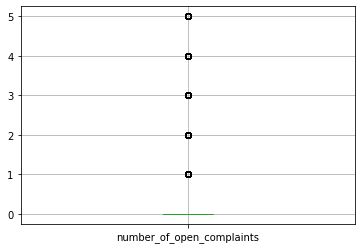

In [55]:
# Checking the outliers before drop ('number_of_open_complaints'):
file2[['number_of_open_complaints']].boxplot()

In [56]:
# Droping the outliers from column
# file1 = file1.drop(list(out_list), inplace=False)

In [57]:
# Checking the outliers after drop ('number_of_open_complaints'):
# file1[['number_of_open_complaints']].boxplot()

In [58]:
# Checking IQR ('number_of_policies'):
Q1 = file2[['number_of_policies']].quantile(0.25)
Q3 = file2[['number_of_policies']].quantile(0.75)
IQR = Q3 - Q1

print(IQR)
print(Q1)
print(Q3)

number_of_policies    3.0
dtype: float64
number_of_policies    1.0
Name: 0.25, dtype: float64
number_of_policies    4.0
Name: 0.75, dtype: float64


In [59]:
# Defining the lower and upper whiskers ('number_of_policies'):
lower_whisker = (Q1[0] - 1.5*(IQR[0]))
upper_whisker = (Q3[0] + 1.5*(IQR[0]))

print(lower_whisker)
print(upper_whisker)

-3.5
8.5


In [60]:
# Removing the outliers from the column:
# Creating a list with all outliers ('number_of_policies'):

out_list = list(file2[(file2['number_of_policies']  < lower_whisker) | (file2['number_of_policies'] >  upper_whisker)].index)
print(out_list)

[6, 74, 94, 96, 98, 105, 108, 117, 121, 151, 222, 226, 228, 229, 298, 302, 331, 366, 371, 400, 416, 444, 461, 469, 482, 484, 494, 525, 539, 555, 559, 585, 621, 650, 671, 675, 687, 718, 736, 739, 811, 813, 827, 845, 864, 912, 976, 1000, 1055, 1070, 1141, 1146, 1166, 1191, 1201, 1203, 1208, 1215, 1229, 1234, 1237, 1249, 1250, 1252, 1270, 1309, 1387, 1401, 1412, 1471, 1474, 1508, 1562, 1566, 1567, 1610, 1619, 1642, 1646, 1660, 1686, 1728, 1733, 1758, 1775, 1794, 1825, 1893, 1894, 1964, 1989, 2007, 2014, 2077, 2099, 2101, 2102, 2149, 2160, 2179, 2181, 2194, 2206, 2222, 2243, 2247, 2255, 2265, 2317, 2319, 2365, 2385, 2390, 2418, 2427, 2444, 2460, 2535, 2536, 2538, 2557, 2558, 2567, 2571, 2590, 2591, 2593, 2603, 2613, 2620, 2631, 2637, 2654, 2727, 2758, 2794, 2810, 2841, 2842, 2846, 2848, 2865, 2872, 2927, 2949, 2987, 2990, 3014, 3025, 3047, 3048, 3140, 3146, 3147, 3163, 3169, 3223, 3241, 3256, 3263, 3266, 3268, 3279, 3282, 3312, 3322, 3337, 3341, 3357, 3359, 3368, 3373, 3384, 3395, 3433, 34

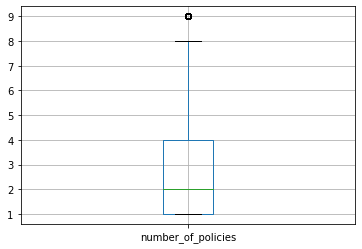

In [61]:
# Checking the outliers before drop ('number_of_policies'):
file2[['number_of_policies']].boxplot()

In [62]:
# Droping the outliers from column
file2 = file2.drop(list(out_list), inplace=False)

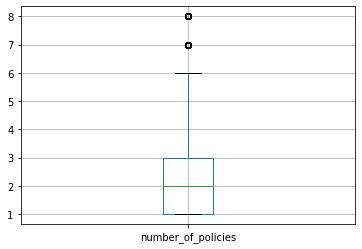

In [63]:
# Checking the outliers after drop ('number_of_policies'):
file2[['number_of_policies']].boxplot()

In [64]:
# Checking IQR ('total_claim_amount'):
Q1 = file2[['total_claim_amount']].quantile(0.25)
Q3 = file2[['total_claim_amount']].quantile(0.75)
IQR = Q3 - Q1

print(IQR)
print(Q1)
print(Q3)

total_claim_amount    266.541676
dtype: float64
total_claim_amount    260.879903
Name: 0.25, dtype: float64
total_claim_amount    527.421579
Name: 0.75, dtype: float64


In [65]:
# Defining the lower and upper whiskers ('total_claim_amount'):
lower_whisker = (Q1[0] - 1.5*(IQR[0]))
upper_whisker = (Q3[0] + 1.5*(IQR[0]))

print(lower_whisker)
print(upper_whisker)

-138.932611
927.2340929999999


In [66]:
# Removing the outliers from the column:
# Creating a list with all outliers ('total_claim_amount'):

out_list = list(file2[(file2['total_claim_amount']  < lower_whisker) | (file2['total_claim_amount'] >  upper_whisker)].index)
print(out_list)

[1, 73, 104, 135, 142, 203, 205, 357, 362, 392, 422, 457, 485, 502, 514, 606, 649, 673, 713, 784, 869, 891, 977, 1005, 1020, 1119, 1134, 1145, 1247, 1275, 1284, 1363, 1365, 1384, 1448, 1476, 1604, 1621, 1622, 1633, 1636, 1670, 1716, 1871, 1955, 1988, 2008, 2022, 2035, 2139, 2157, 2248, 2260, 2318, 2328, 2431, 2550, 2626, 2662, 2709, 2710, 2808, 2827, 2993, 3100, 3152, 3201, 3231, 3302, 3310, 3313, 3327, 3387, 3414, 3416, 3468, 3629, 3685, 3694, 3715, 3731, 3737, 3780, 3824, 3843, 3904, 3908, 3954, 4016, 4105, 4132, 4133, 4141, 4176, 4202, 4221, 4231, 4272, 4314, 4319, 4322, 4330, 4331, 4392, 4436, 4455, 4536, 4540, 4572, 4583, 4592, 4597, 4631, 4668, 4694, 4807, 4836, 4841, 4962, 4967, 4996, 5001, 5057, 5063, 5073, 5077, 5207, 5218, 5226, 5250, 5274, 5365, 5374, 5390, 5408, 5438, 5447, 5508, 5530, 5549, 5623, 5702, 5708, 5713, 5722, 5725, 5749, 5750, 5774, 5788, 5798, 5871, 5943, 5951, 5974, 5976, 6027, 6039, 6062, 6077, 6130, 6239, 6280, 6290, 6315, 6323, 6327, 6388, 6403, 6518, 6617,

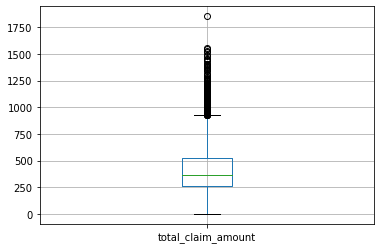

In [67]:
# Checking the outliers before drop ('total_claim_amount'):
file2[['total_claim_amount']].boxplot()

In [68]:
# Droping the outliers from column
file2 = file2.drop(list(out_list), inplace=False)

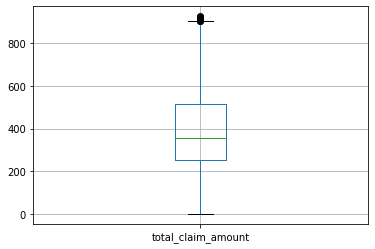

In [69]:
# Checking the outliers after drop ('total_claim_amount'):
file2[['total_claim_amount']].boxplot()

In [70]:
# Normalization.
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import norm
from scipy.stats import anderson

#Check normality.
file2.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,7399.000000,7399.000000,7399.000000,7399.000000,7399.000000,7399.000000,7399.000000,7399.000000
mean,6053.041966,38638.951210,85.817948,15.003919,48.090958,0.390864,2.730504,379.264135
std,3169.544162,30367.948999,21.675785,10.017468,27.952915,0.927168,2.105382,200.956817
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3492.944747,12078.000000,68.000000,6.000000,24.000000,0.000000,1.000000,253.052049
50%,5281.833471,35149.000000,78.000000,14.000000,48.000000,0.000000,2.000000,355.200000
75%,7995.426086,63135.000000,103.000000,23.000000,72.000000,0.000000,3.000000,513.600000
max,16407.664610,99981.000000,165.000000,35.000000,99.000000,5.000000,8.000000,925.137143


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002752EE4A688>,
      dtype=object)

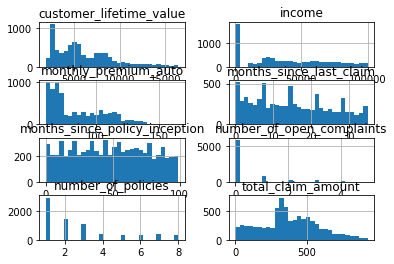

In [71]:
file2.hist(layout= (4,2), bins=30)

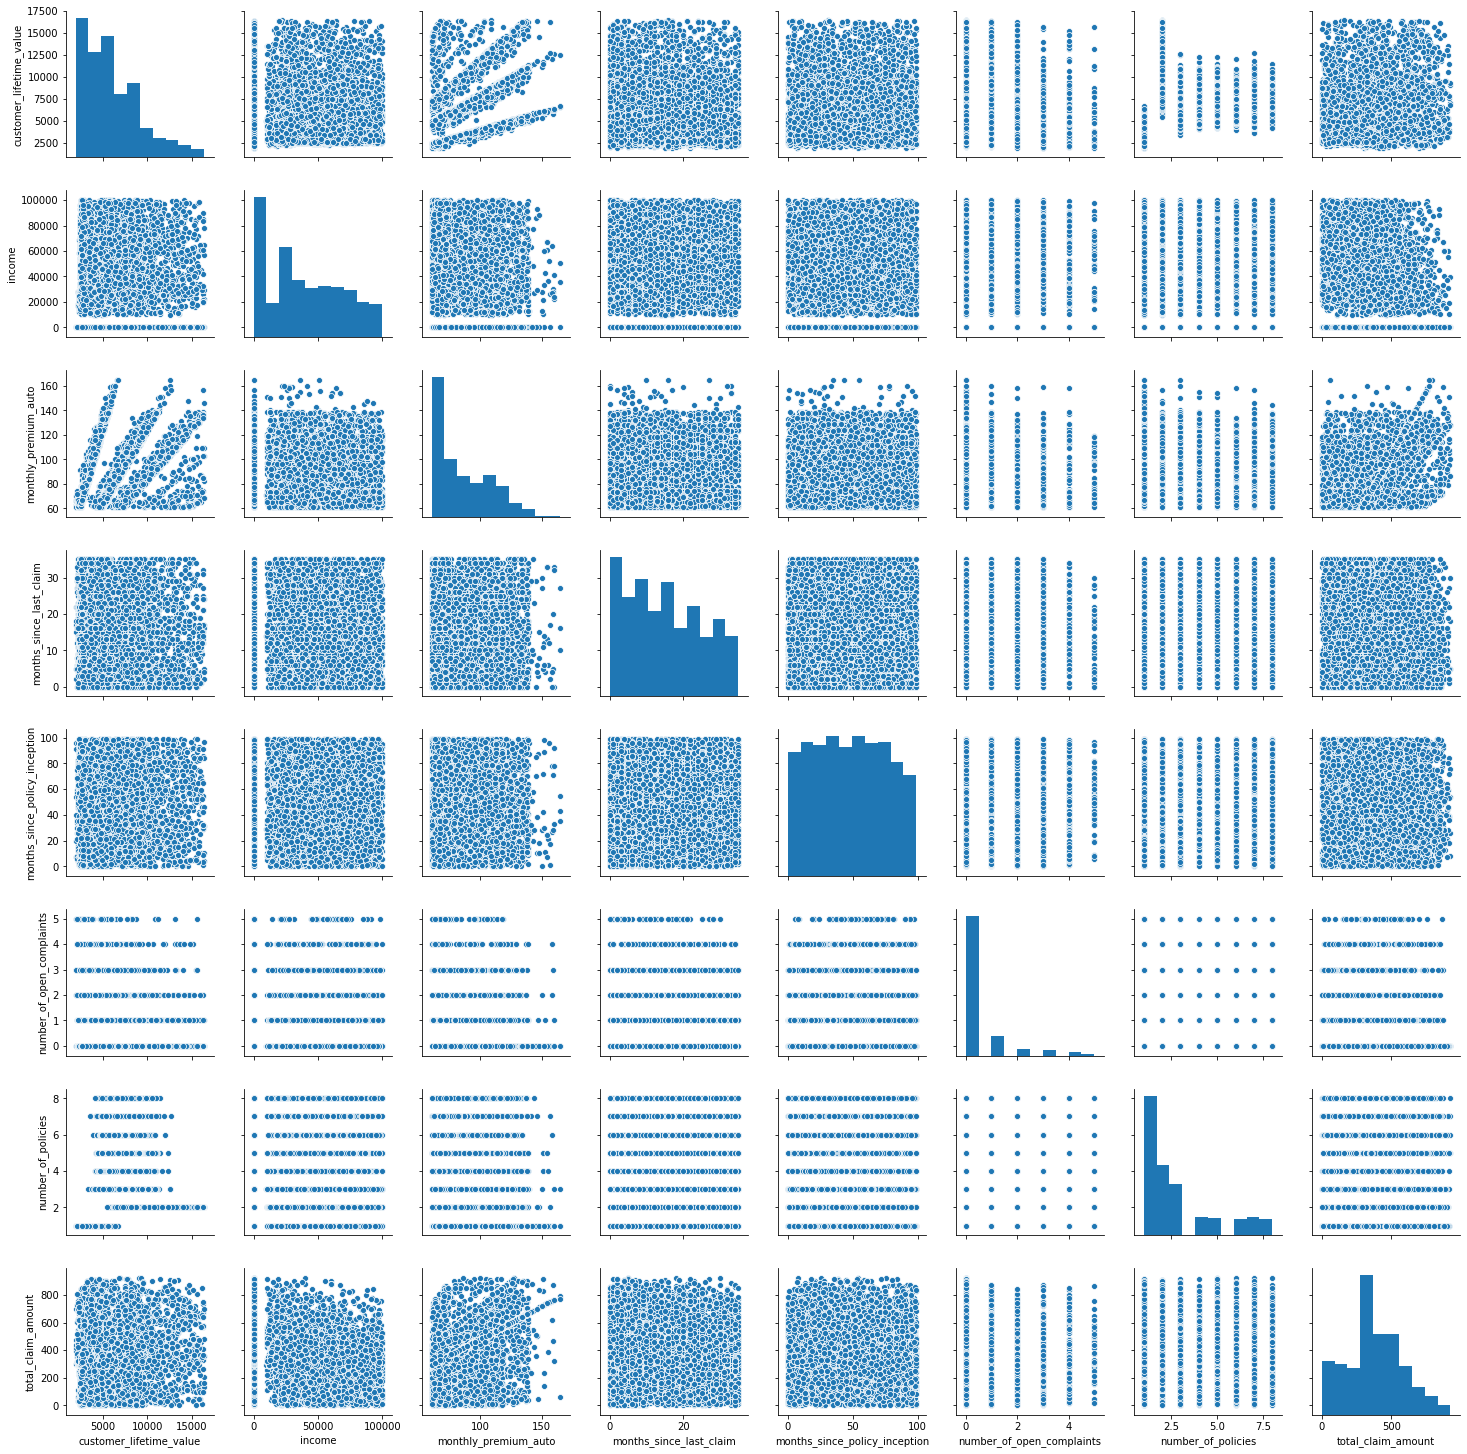

In [72]:
sns.pairplot(file2)

In [73]:
# Shapiro–Wilk normality test:
print("Shapiro-Wilk's normality test for Customer Life Time is:", shapiro(file2['customer_lifetime_value']))
print("Shapiro-Wilk's normality test for Income is:",shapiro(file2['income']))
print("Shapiro-Wilk's normality test for Monthly Premium Auto is:",shapiro(file2['monthly_premium_auto']))
print("Shapiro-Wilk's normality test for Months Since Last Claim is:",shapiro(file2['months_since_last_claim']))
print("Shapiro-Wilk's normality test for Months Since Policy Inception is:",shapiro(file2['months_since_policy_inception']))
print("Shapiro-Wilk's normality test for Number of Open Complaints is:",shapiro(file2['number_of_open_complaints']))
print("Shapiro-Wilk's normality test for Number of Policies is:",shapiro(file2['number_of_policies']))
print("Shapiro-Wilk's normality test for Total Claim Amount is:",shapiro(file2['total_claim_amount']))

Shapiro-Wilk's normality test for Customer Life Time is: (0.9100640416145325, 0.0)
Shapiro-Wilk's normality test for Income is: (0.9265424609184265, 0.0)
Shapiro-Wilk's normality test for Monthly Premium Auto is: (0.8945020437240601, 0.0)
Shapiro-Wilk's normality test for Months Since Last Claim is: (0.9501655101776123, 1.6815581571897805e-44)
Shapiro-Wilk's normality test for Months Since Policy Inception is: (0.9608258605003357, 1.1049518650894048e-40)
Shapiro-Wilk's normality test for Number of Open Complaints is: (0.48650211095809937, 0.0)
Shapiro-Wilk's normality test for Number of Policies is: (0.7877957820892334, 0.0)
Shapiro-Wilk's normality test for Total Claim Amount is: (0.984443187713623, 9.782423151809725e-28)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [74]:
file3 = file2._get_numeric_data().columns
display(file3)

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [75]:
n_columns = list(file2)
n_columns

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

In [76]:
display(file2)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
5,8256.297800,62902,69,14,94,0,2,159.383042
...,...,...,...,...,...,...,...,...
9128,4100.398533,47761,104,16,58,0,1,541.282007
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [77]:
# Anderson method to check the normality of data

for i in range(len(n_columns)):
    x = stats.anderson(file2[file3[i]], dist='norm')
    print(file3[i])
    print(x)

customer_lifetime_value
AndersonResult(statistic=175.03961117439303, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
income
AndersonResult(statistic=144.43802563009012, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
monthly_premium_auto
AndersonResult(statistic=279.85635459995683, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
months_since_last_claim
AndersonResult(statistic=95.97655758634846, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
months_since_policy_inception
AndersonResult(statistic=68.5814218522928, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
number_of_open_complaints
AndersonResult(statistic=1655.8912802174236, critical_va

In [78]:
#Check multicollinearity.
file2.corr()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.059035,0.407784,-0.024332,-0.005098,-0.031076,0.249674,0.146253
income,0.059035,1.000000,0.018343,-0.027343,0.011550,-0.003231,0.000899,-0.378444
monthly_premium_auto,0.407784,0.018343,1.000000,-0.021593,0.009848,-0.025858,-0.016788,0.434679
months_since_last_claim,-0.024332,-0.027343,-0.021593,1.000000,-0.048714,0.014461,0.010920,-0.019463
months_since_policy_inception,-0.005098,0.011550,0.009848,-0.048714,1.000000,-0.003296,-0.008587,-0.025929
number_of_open_complaints,-0.031076,-0.003231,-0.025858,0.014461,-0.003296,1.000000,0.009859,-0.019637
number_of_policies,0.249674,0.000899,-0.016788,0.010920,-0.008587,0.009859,1.000000,-0.010863
total_claim_amount,0.146253,-0.378444,0.434679,-0.019463,-0.025929,-0.019637,-0.010863,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

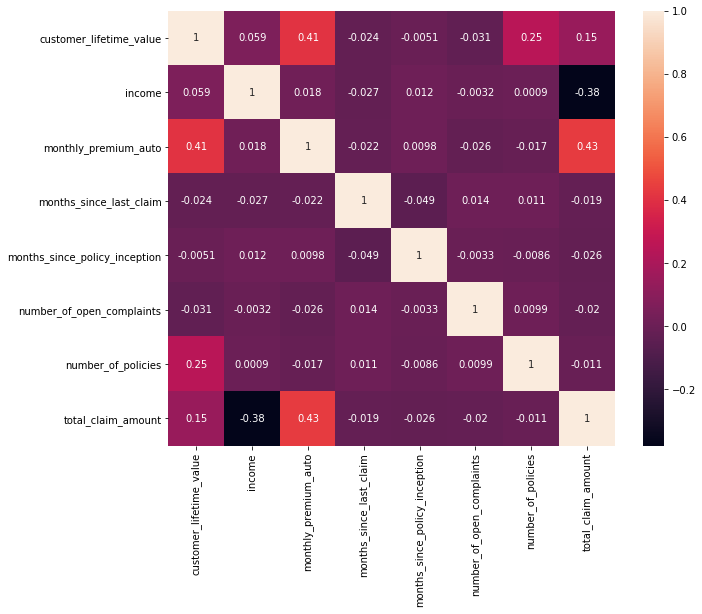

In [79]:
##plotting heat map pearson
corr_matrix = file2.corr(method='pearson')
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(corr_matrix ,annot =True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

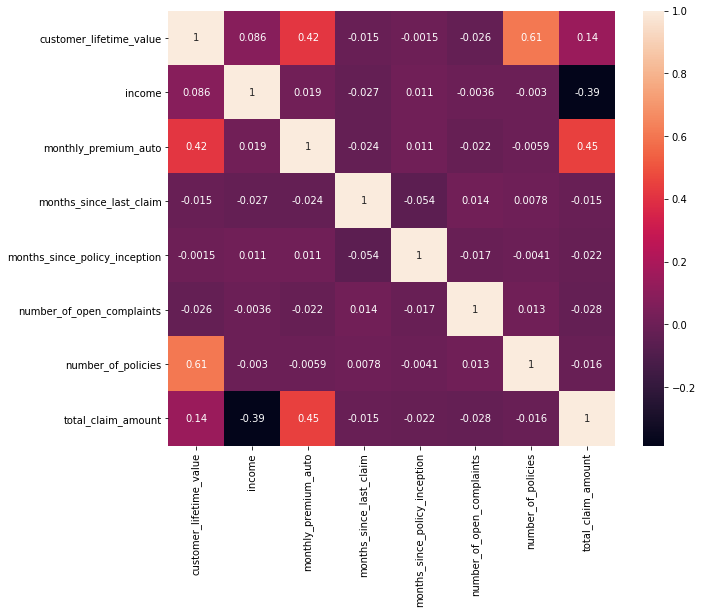

In [80]:
##plotting heat map spearman
corr_matrix = file2.corr(method='spearman')
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(corr_matrix ,annot =True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

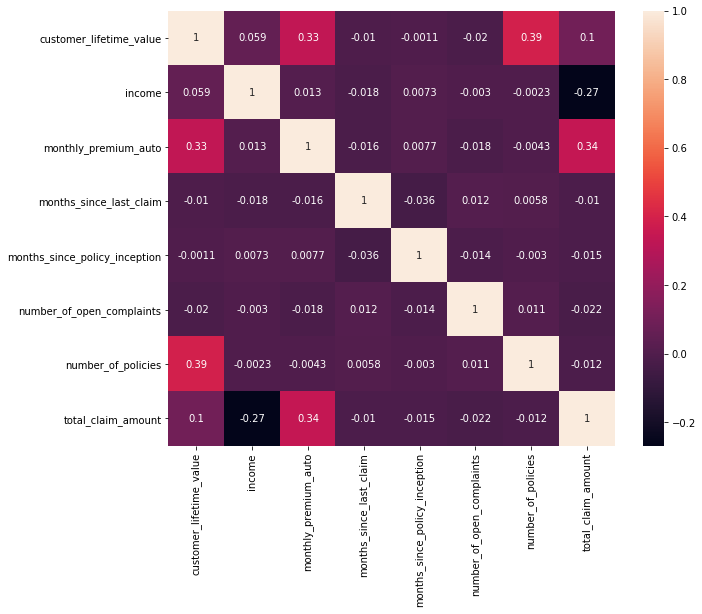

In [81]:
##plotting heat map pearson
corr_matrix = file2.corr(method='kendall')
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(corr_matrix ,annot =True)
plt.show

In [82]:
# Encoding Categorical Data.
file4 = file1.select_dtypes(include=object or str)
file4.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [83]:
file5 = file4[['coverage', 'education', 'vehicle_size']]
file5.columns

Index(['coverage', 'education', 'vehicle_size'], dtype='object')

In [84]:
file6 = file4[['state', 'response', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class']]
file6.columns

Index(['state', 'response', 'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class'],
      dtype='object')

# 05 - Modeling

In [85]:
# Ordinal Encoding

# define data
data_ord = asarray(file5)
print(data_ord)

[['Basic' 'Bachelor' 'Medsize']
 ['Extended' 'Bachelor' 'Medsize']
 ['Premium' 'Bachelor' 'Medsize']
 ...
 ['Extended' 'Bachelor' 'Medsize']
 ['Extended' 'College' 'Large']
 ['Extended' 'College' 'Medsize']]


In [86]:
# define ordinal encoding
encoder = OrdinalEncoder()

In [87]:
# transform data
ordinal = encoder.fit_transform(data_ord)
print(ordinal)

[[0. 0. 1.]
 [1. 0. 1.]
 [2. 0. 1.]
 ...
 [1. 0. 1.]
 [1. 1. 0.]
 [1. 1. 1.]]


In [88]:
# separate into input and output columns
X = data_ord[:, :-1].astype(str)
y = data_ord[:, -1].astype(str)

In [89]:
# summarize
print('Input', X.shape)
print('Output', y.shape)

Input (9134, 2)
Output (9134,)


In [90]:
# ordinal encode input variables
ordinal = OrdinalEncoder()
X = ordinal.fit_transform(X)

In [91]:
# ordinal encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [92]:
# summarize the transformed data
print('Input', X.shape)
print(X[:5, :])
print('Output', y.shape)
print(y[:5])

Input (9134, 2)
[[0. 0.]
 [1. 0.]
 [2. 0.]
 [0. 0.]
 [0. 0.]]
Output (9134,)
[1 1 1 1 1]


In [93]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [94]:
# ordinal encode input variables
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(X_train)
X_train = ordinal_encoder.transform(X_train)
X_test = ordinal_encoder.transform(X_test)

In [95]:
# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [96]:
# define the model
model = LogisticRegression()

In [97]:
# fit on the training set
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
# predict on test set
yhat = model.predict(X_test)

In [99]:
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 69.98


In [100]:
model_ord = linear_model.LinearRegression()

lm_ord = model_ord.fit(X_train, y_train)
predictions_ord = lm_ord.predict(X_test)
lm_ord.score(X_train, y_train)
r2_score(y_test, predictions_ord)
mse_ord = mean_squared_error(y_test, predictions_ord)
rmse_ord = mean_squared_error(y_test, predictions_ord, squared=False)
r2_ord = r2_score(y_test, predictions_ord)
mae_ord = mean_absolute_error(y_test, predictions_ord)

print("The intercept is:", lm_ord.intercept_)
print("The slope is:", lm_ord.coef_)
print("The mean absolute error is: %5.3f" % (mae_ord))
print("The mean squared error is: %5.3f" % (mse_ord))
print("The root mean squared error is: %5.3f" % (rmse_ord))
print("R2 score is: %5.3f" %  (r2_ord))

The intercept is: 1.10280321584581
The slope is: [-0.00701001 -0.00751431]
The mean absolute error is: 0.354
The mean squared error is: 0.292
The root mean squared error is: 0.540
R2 score is: -0.002


In [101]:
# One Hot Encoding

In [102]:
# define data
data_ohe = asarray(file6)
print(data_ohe)

[['Washington' 'No' 'Employed' ... 'Offer1' 'Agent' 'Two-Door Car']
 ['Arizona' 'No' 'Unemployed' ... 'Offer3' 'Agent' 'Four-Door Car']
 ['Nevada' 'No' 'Employed' ... 'Offer1' 'Agent' 'Two-Door Car']
 ...
 ['California' 'No' 'Unemployed' ... 'Offer1' 'Branch' 'Four-Door Car']
 ['California' 'No' 'Employed' ... 'Offer3' 'Branch' 'Four-Door Car']
 ['California' 'No' 'Unemployed' ... 'Offer4' 'Call Center'
  'Two-Door Car']]


In [103]:
# define one hot encoding
encoder = OneHotEncoder(sparse=False)

In [104]:
# transform data
onehot = encoder.fit_transform(file6)
print(onehot)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 1.]]


In [105]:
# summarize
print('Input', X.shape)
print('Output', y.shape)

Input (9134, 2)
Output (9134,)


In [106]:
# separate into input and output columns
X = onehot[:, :-1].astype(str)
y = onehot[:, -1].astype(str)

In [107]:
# split the dataset into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [108]:
# one hot encode input variables
onehot_encoder = OneHotEncoder(sparse=False)
X = onehot_encoder.fit_transform(X)

In [109]:
# ordinal encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [110]:
# summarize the transformed data
print('Input', X.shape)
print(X[:5, :])

Input (9134, 90)
[[1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.
  0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.
  1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.
  0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.
  0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0.
  1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0.
  0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.
  0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0.
  1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.
  0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.
  1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0

In [111]:
# one-hot encode input variables
onehot_encoder = OneHotEncoder()
onehot_encoder.fit(X_train)
X_train = onehot_encoder.transform(X_train)
X_test = onehot_encoder.transform(X_test)

In [112]:
# ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [113]:
# define the model
model = LogisticRegression()

In [114]:
# fit on the training set
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
# predict on test set
yhat = model.predict(X_test)

In [116]:
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 69.98


In [117]:
# Apply model.

# 06 - Model Validation

In [118]:
model = linear_model.LinearRegression()

lm = model.fit(X_train, y_train)
predictions = lm.predict(X_test)
lm.score(X_train, y_train)
r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

print("The intercept is:", lm.intercept_)
print("The slope is:", lm.coef_)
print("The mean absolute error is: %5.3f" % (mae))
print("The mean squared error is: %5.3f" % (mse))
print("The root mean squared error is: %5.3f" % (rmse))
print("R2 score is: %5.3f" %  (r2))


The intercept is: 1.0831918358131252
The slope is: [ 0.00613622 -0.01252822  0.00639199  0.02119244  0.00311317 -0.01778634
 -0.00995604  0.00343678]
The mean absolute error is: 0.354
The mean squared error is: 0.292
The root mean squared error is: 0.540
R2 score is: -0.001


# 07 - Reporting

In [119]:
# Present results.